<a href="https://colab.research.google.com/github/JorgeICS/Primeos_Analisis_Geopandas/blob/main/nodos_ciclo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas pandas matplotlib

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CF_todas_simp = gpd.read_file('/content/drive/MyDrive/Carreteras/filtradas/CF_todas_simp.geojson')

In [36]:
sin_ID = CF_todas_simp.loc[(CF_todas_simp['NOMBRE']=='nd')]

In [37]:
sin_ID.shape

(1000, 23)

In [38]:
#  QUITAR TODOS LOS DATOS QUE SON =  'nd' de la columna NOMBRE en CF_todas_simp Y poneros en la variable CF_con_ID

CF_con_ID = CF_todas_simp.loc[(CF_todas_simp['NOMBRE']!='nd')]


In [39]:
CF_con_ID.shape

(114586, 23)

In [40]:
columnas_originales=CF_todas_simp.columns
nuevos_ID= pd.DataFrame(columns=columnas_originales)

In [41]:
columnas_originales

Index(['ID_RED', 'TIPO_VIAL', 'NOMBRE', 'CODIGO', 'COND_PAV', 'RECUBRI',
       'CARRILES', 'ESTATUS', 'CONDICION', 'NIVEL', 'PEAJE', 'ADMINISTRA',
       'JURISDI', 'CIRCULA', 'ESCALA_VIS', 'VELOCIDAD', 'UNION_INI',
       'UNION_FIN', 'LONGITUD', 'ANCHO', 'FECHA_ACT', 'CALIREPR', 'geometry'],
      dtype='object')

In [42]:
nuevos_ID.shape

(0, 23)

In [43]:
# EL BUENO
columna1 = 'UNION_INI'
columna2 = 'UNION_FIN'
columna3 = 'CODIGO'
# Columnas CF_con_ID
columna4 = 'NOMBRE'

while len(sin_ID)>431:

  for idx, row in sin_ID.iterrows():

    if (row[columna1] in CF_con_ID[columna2].values) and (row[columna2] in CF_con_ID[columna1].values):
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] in CF_con_ID[columna2].values and (row[columna2] not in CF_con_ID[columna1].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna2] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] not in CF_con_ID[columna2].values and (row[columna2] in CF_con_ID[columna1].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    else:
      sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']




<ipython-input-43-066eb8447e5b>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)


In [44]:
nuevos_ID.shape

(569, 23)

In [45]:
sin_ID.shape

(431, 23)

In [ ]:
zaragoza=CF_todas_simp.loc[CF_todas_simp['NOMBRE']=='zaragoza-la_encantada-la_bolsa']

In [ ]:
zaragoza

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
37614,399279,Carretera,zaragoza-la_encantada-la_bolsa,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,3,70,1017822,1018586,3114.78103,6.0,2023-08-07 22:24:19,Definida,"LINESTRING (-99.98551 23.74283, -99.98565 23.7..."


In [ ]:
zigua = CF_con_ID.loc[CF_con_ID['NOMBRE']=='zihuatanejo-la_mira']
ziguan = nuevos_ID.loc[nuevos_ID['NOMBRE']=='zihuatanejo-la_mira']


<Axes: >

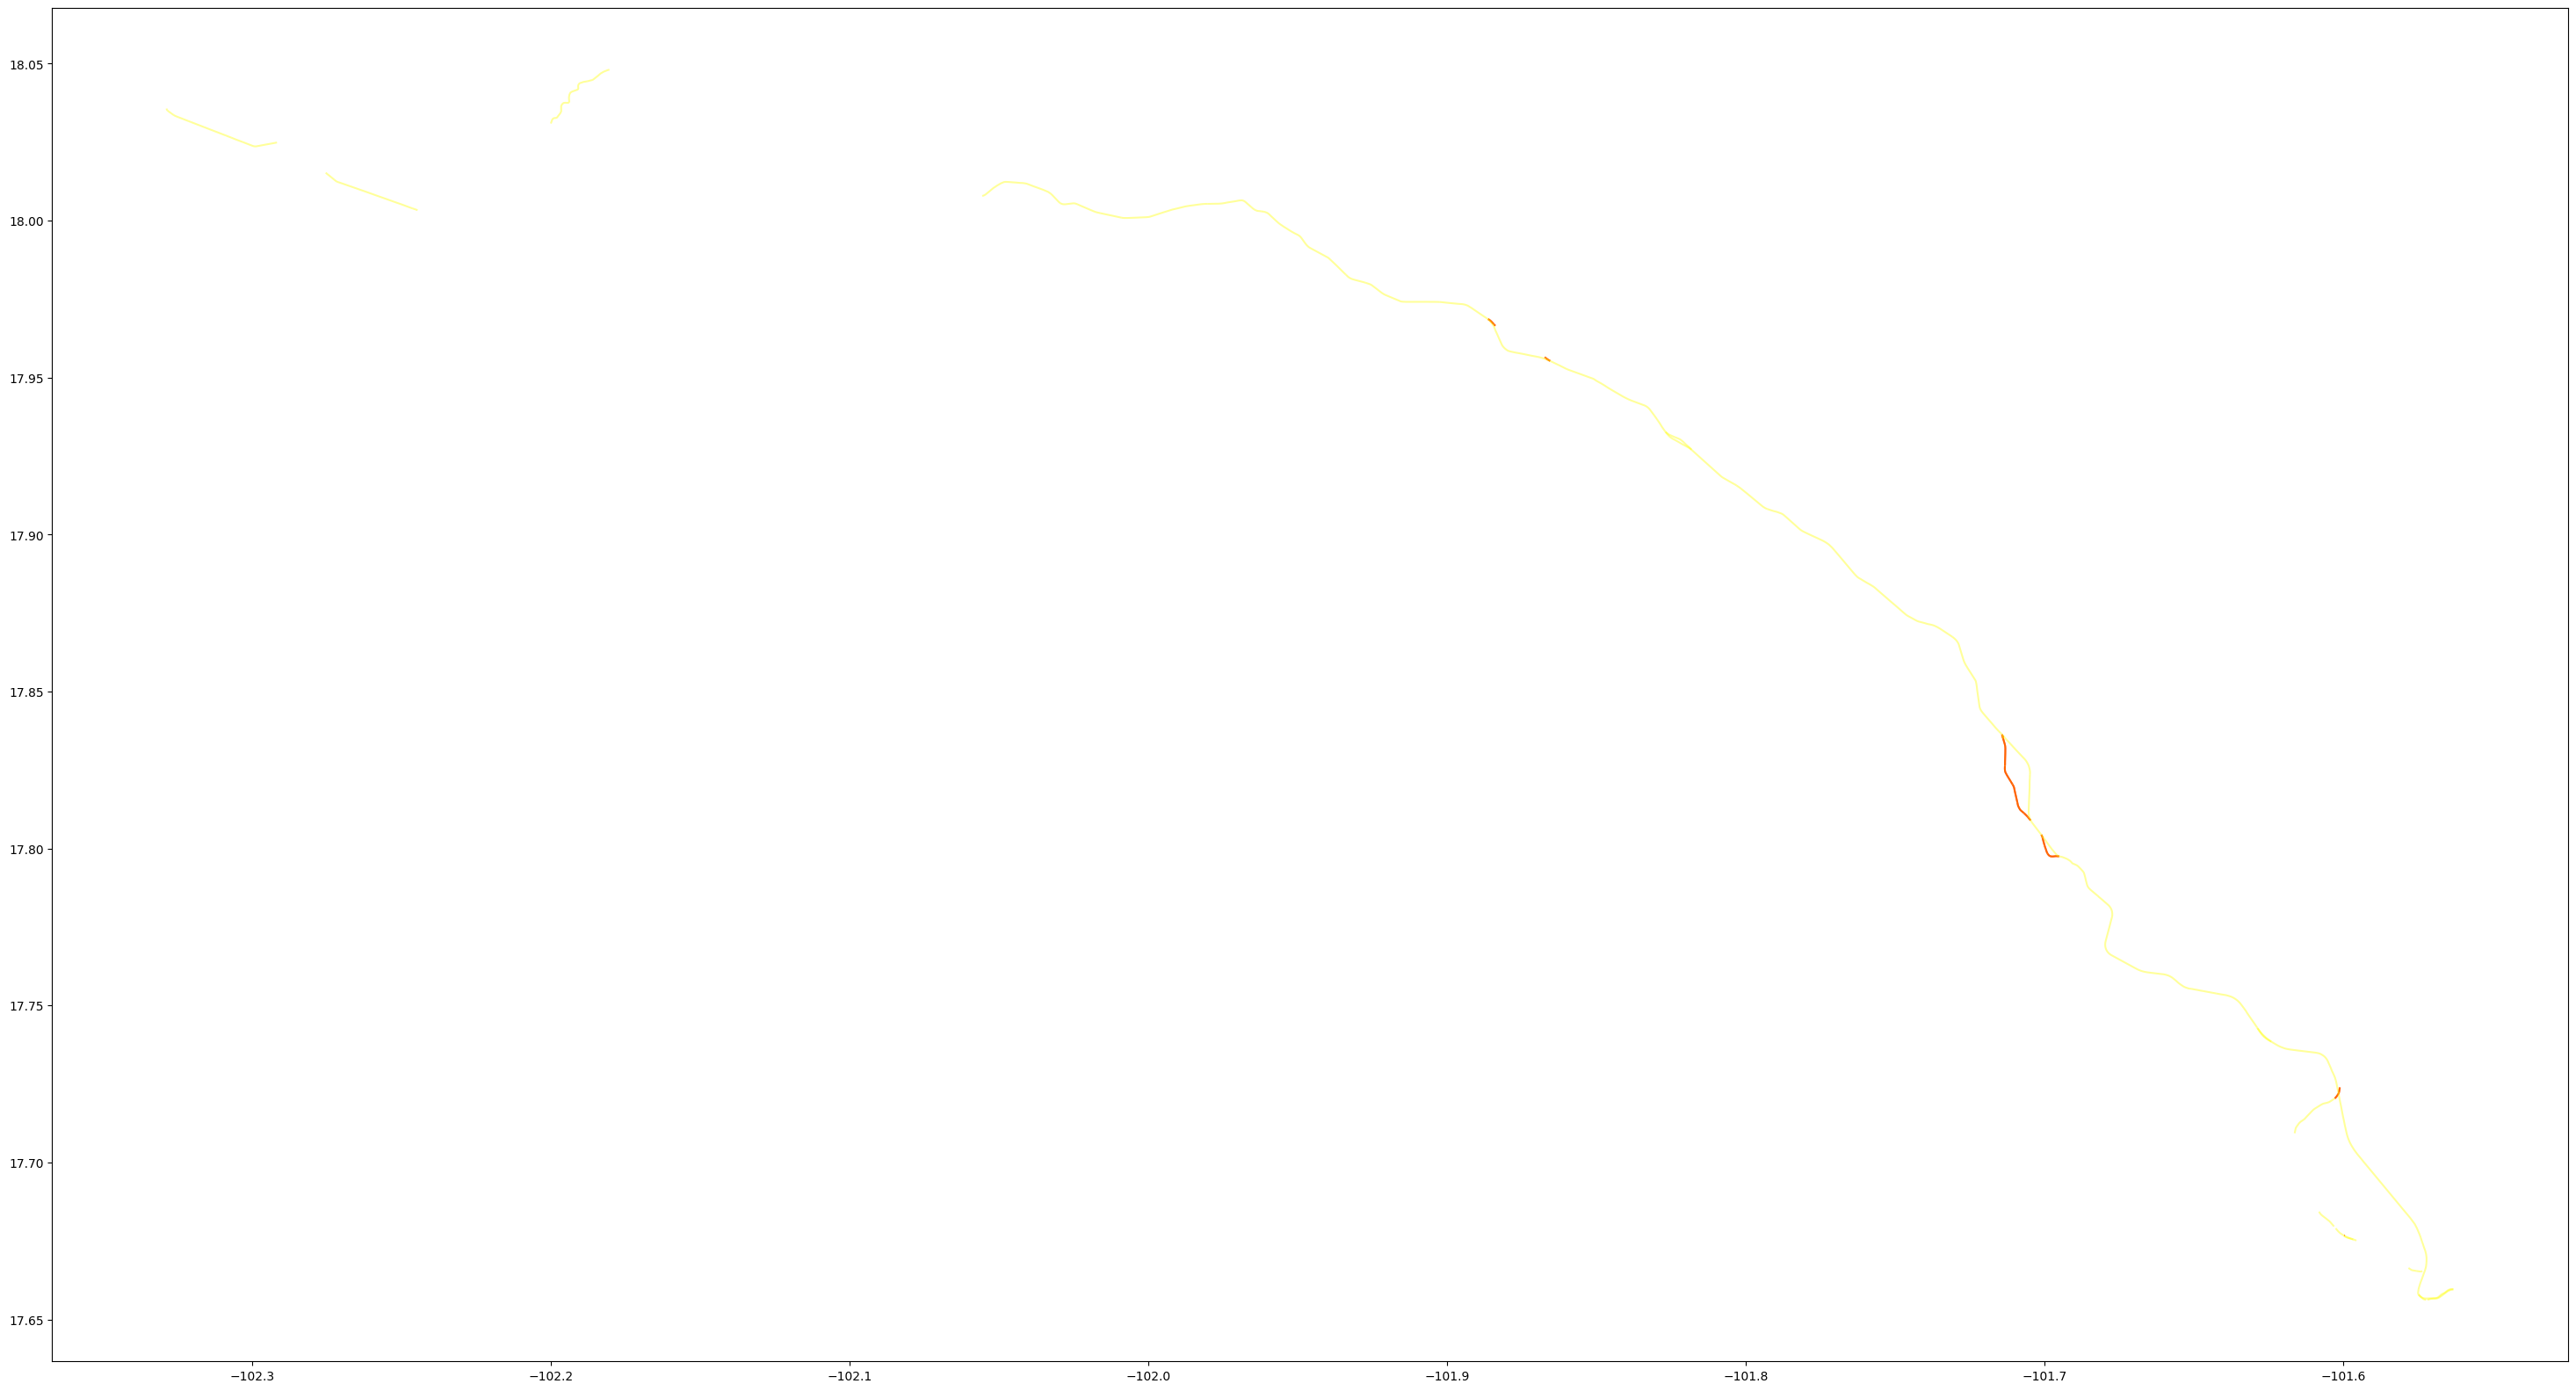

In [ ]:
axis = ziguan.plot(color='red', figsize=(40,20))
zigua.plot(ax=axis, color='yellow',alpha=0.4, figsize=(40,20))

In [ ]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [ ]:
sin_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
455,12925,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1490838,1490839,703.185436,6.5,2020-10-12 12:53:13,Definida,"LINESTRING (-101.65692 17.75876, -101.65677 17...",nd,nd
458,12934,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,929164,2852,1018.532121,6.5,2021-04-15 12:29:14,Definida,"LINESTRING (-101.64469 17.75337, -101.64459 17...",nd,nd
523,13325,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1490839,929163,646.472456,6.5,2020-10-12 12:25:30,Definida,"LINESTRING (-101.65131 17.75550, -101.65111 17...",nd,nd
536,13387,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,2852,2698,165.746736,6.5,2021-04-21 13:12:46,Definida,"LINESTRING (-101.63713 17.74802, -101.63702 17...",nd,nd
720,14380,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,929605,1491310,578.254864,6.5,2020-10-12 11:10:33,Definida,"LINESTRING (-101.87095 17.96040, -101.86916 17...",nd,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112633,2647944,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,50,481396,481397,48.106395,8.0,2022-08-01 19:11:43,Definida,"LINESTRING (-98.85756 19.67894, -98.85773 19.6...",nd,nd
112634,2647945,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,50,481398,481396,45.828791,8.0,2022-08-01 19:11:53,Definida,"LINESTRING (-98.85799 19.67902, -98.85795 19.6...",nd,nd
114019,3061140,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,794399,794400,5.889365,9.0,2023-05-12 18:33:26,Definida,"LINESTRING (-98.71714 20.12692, -98.71717 20.1...",nd,nd
114041,3065070,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,797319,797320,10.969842,9.0,2023-05-15 16:05:09,Definida,"LINESTRING (-98.71354 20.12010, -98.71349 20.1...",nd,nd


In [ ]:
sin_ID.loc[(sin_ID['conex_ini'] !='nd') | (sin_ID['conex_fin'] !='nd')]

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin


In [ ]:
CF_agrupadas = CF_con_ID.groupby('NOMBRE').agg({
    'UNION_INI': ['max', 'min'],
    'UNION_FIN': ['max', 'min']
})
CF_agrupadas

UNION_INI          UNION_FIN         
                                        max      min       max      min
NOMBRE                                                                 
4_caminos-cercalisa                 1848756   334956   1848756   334956
a_aguascalientes                    1622846   502178   1622846   502464
a_cerro_gordo                       1734409   255333   1734409   255333
a_ent_maxipista_guadalajara-tepic   1634164  1602121   1634164  1602121
a_guadalajara                       1653287   395149   1653287   395136
...                                     ...      ...       ...      ...
zapotlanejo-lagos_de_moreno         1855225   127694   1855225   127694
zaragoza-la_encantada-la_bolsa      1017822  1017822   1018586  1018586
zihuatanejo-la_mira                 1842104     2678   1842104     2811
zihuatanejo-playa_azul              1818733   208625   1818733   208625
zitacuaro-ciudad_altamirano         1910458      588   1910458      788

[990 rows x 4 columns]

In [ ]:
CF_agrupadas.columns = ['UNION_INI_max', 'UNION_INI_min', 'UNION_FIN_max', 'UNION_FIN_min']


In [ ]:
CF_agrupadas['UNION_MAX'] = CF_agrupadas[['UNION_INI_max', 'UNION_FIN_max']].max(axis=1)
CF_agrupadas['UNION_MIN'] = CF_agrupadas[['UNION_INI_min', 'UNION_FIN_min']].min(axis=1)

In [ ]:
CF_INI_FIN = CF_agrupadas[['UNION_MAX', 'UNION_MIN']]


In [ ]:
CF_INI_FIN

,UNION_MAX,UNION_MIN
NOMBRE,,
4_caminos-cercalisa,1848756,334956
a_aguascalientes,1622846,502178
a_cerro_gordo,1734409,255333
a_ent_maxipista_guadalajara-tepic,1634164,1602121
a_guadalajara,1653287,395136
...,...,...
zapotlanejo-lagos_de_moreno,1855225,127694
zaragoza-la_encantada-la_bolsa,1018586,1017822
zihuatanejo-la_mira,1842104,2678


In [ ]:
# prompt: AÑADIR EL INDEX CF_INI_FIN EN OTRA COLUMNA LLAMADA 'NOMBRE'

CF_INI_FIN['NOMBRE'] = CF_INI_FIN.index


<ipython-input-109-1a1f98fbd051>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CF_INI_FIN['NOMBRE'] = CF_INI_FIN.index


In [ ]:
CF_INI_FIN

,UNION_MAX,UNION_MIN,NOMBRE
NOMBRE,,,
4_caminos-cercalisa,1848756,334956,4_caminos-cercalisa
a_aguascalientes,1622846,502178,a_aguascalientes
a_cerro_gordo,1734409,255333,a_cerro_gordo
a_ent_maxipista_guadalajara-tepic,1634164,1602121,a_ent_maxipista_guadalajara-tepic
a_guadalajara,1653287,395136,a_guadalajara
...,...,...,...
zapotlanejo-lagos_de_moreno,1855225,127694,zapotlanejo-lagos_de_moreno
zaragoza-la_encantada-la_bolsa,1018586,1017822,zaragoza-la_encantada-la_bolsa
zihuatanejo-la_mira,1842104,2678,zihuatanejo-la_mira


In [59]:
sin_ID_sorted = sin_ID.sort_values(by='UNION_INI')

In [60]:
sin_ID_sorted

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
536,13387,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,2852,2698,165.746736,6.5,2021-04-21 13:12:46,Definida,"LINESTRING (-101.63713 17.74802, -101.63702 17...",na,nan
75347,951201,Carretera,nd,N/D,Con pavimento,Concreto,1,Habilitado,En operación,0,...,40,10423,1774708,250.360004,6.0,2021-05-26 11:18:28,Definida,"LINESTRING (-96.90369 19.52539, -96.90364 19.5...",na,nan
12214,176171,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,11500,100450,34.813618,7.0,2022-05-31 17:14:55,Definida,"LINESTRING (-96.42090 19.72088, -96.42074 19.7...",na,nan
7548,124412,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,17585,17586,471.302048,9.0,2022-02-15 16:38:21,Definida,"LINESTRING (-98.67556 20.29314, -98.67685 20.2...",na,nan
11824,172949,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,97644,97653,42.423239,7.0,2017-02-13 09:26:17,Definida,"LINESTRING (-98.46373 19.51069, -98.46364 19.5...",na,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86239,1217817,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,40,1910629,1910630,21.006440,7.0,2018-01-30 12:36:48,Definida,"LINESTRING (-105.07117 21.56690, -105.07103 21...",na,nan
86228,1217616,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,40,1910630,1910631,56.592947,7.0,2018-01-30 11:09:42,Definida,"LINESTRING (-105.07103 21.56676, -105.07093 21...",na,nan
86236,1217775,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,40,1910631,1675059,20.330937,7.0,2018-01-30 14:50:19,Definida,"LINESTRING (-105.07068 21.56637, -105.07056 21...",na,nan
86230,1217629,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,40,1910637,1851315,90.352178,7.0,2019-08-08 11:06:47,Definida,"LINESTRING (-105.07296 21.56827, -105.07279 21...",na,nan


In [61]:
# prompt: MAXIMO Y MINIMO VALOR DE UNION_INI Y UNION_FIN

# Encuentra el valor máximo y mínimo de 'UNION_INI'
max_union_ini = sin_ID_sorted['UNION_INI'].max()
min_union_ini = sin_ID_sorted['UNION_INI'].min()

# Encuentra el valor máximo y mínimo de 'UNION_FIN'
max_union_fin = sin_ID_sorted['UNION_FIN'].max()
min_union_fin = sin_ID_sorted['UNION_FIN'].min()

print("Valor máximo de UNION_INI:", max_union_ini)
print("Valor mínimo de UNION_INI:", min_union_ini)
print("Valor máximo de UNION_FIN:", max_union_fin)
print("Valor mínimo de UNION_FIN:", min_union_fin)


Valor máximo de UNION_INI: 1910638
Valor mínimo de UNION_INI: 2852
Valor máximo de UNION_FIN: 1910638
Valor mínimo de UNION_FIN: 2698


In [14]:
CF_con_ID_sorted = CF_con_ID.sort_values(by='UNION_INI')

In [15]:
CF_con_ID_sorted

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
730,14434,Carretera,las_cruces-pinotepa_nacional,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,61,1491477,853.750473,6.0,2019-12-10 08:43:18,Definida,"LINESTRING (-98.46383 16.56763, -98.46300 16.5..."
1141,19025,Carretera,chilpancingo-jilotepec,93,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,60,215,216,70.285586,7.0,2021-04-30 12:26:55,Definida,"LINESTRING (-98.59652 17.53965, -98.59671 17.5..."
345,12262,Carretera,chilpancingo-jilotepec,93,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,60,216,1490439,97.455840,7.0,2021-04-30 12:26:03,Definida,"LINESTRING (-98.59718 17.53964, -98.59732 17.5..."
1143,19146,Carretera,chilpancingo-jilotepec,93,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,60,258,259,1826.234097,7.0,2021-04-15 11:17:18,Definida,"LINESTRING (-98.52564 17.69839, -98.52551 17.6..."
109230,2530003,Carretera,chilpancingo-jilotepec,93,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,60,259,380635,401.261938,7.0,2021-04-16 12:41:10,Definida,"LINESTRING (-98.51772 17.68435, -98.51756 17.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44305,447585,Carretera,durango-villa_union,40,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,90,1937019,1412472,116.646765,7.5,2023-03-08 16:53:46,Definida,"LINESTRING (-106.06555 23.28570, -106.06545 23..."
44490,448748,Carretera,durango-villa_union,40,Con pavimento,Asfalto,2,Habilitado,En operación,-1,...,Dos sentidos,1,90,1937020,1413195,134.340332,12.0,2021-09-13 12:59:40,Aproximada,"LINESTRING (-105.85887 23.43685, -105.85807 23..."
45184,455253,Carretera,hermosillo-chihuahua,16,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,1937034,1109898,24.761896,7.0,2014-04-01 13:43:26,Definida,"LINESTRING (-108.92076 28.36741, -108.92052 28..."
45132,454541,Carretera,hermosillo-moctezuma,14,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,40,1937047,1416304,117.798943,7.0,2014-03-31 10:32:39,Definida,"LINESTRING (-110.36389 29.43075, -110.36270 29..."


In [29]:
CF_con_ID_sorted.loc[(CF_con_ID_sorted['UNION_FIN']>=2698)&(CF_con_ID_sorted['UNION_FIN']<=2856)]

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
493,13160,Carretera,zihuatanejo-la_mira,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2678,2821,46.176987,6.5,2014-03-27 09:34:40,Definida,"LINESTRING (-101.96427 18.00343, -101.96418 18..."
307,12067,Carretera,acapulco-zihuatanejo,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2704,2705,716.684452,7.0,2021-06-22 14:15:38,Definida,"LINESTRING (-99.98365 16.96092, -99.98344 16.9..."
311,12085,Carretera,chilpancingo-acapulco,95,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2708,2709,1158.441137,7.0,2021-06-23 08:58:25,Definida,"LINESTRING (-99.78771 16.98746, -99.78742 16.9..."
314,12092,Carretera,las_cruces-pinotepa_nacional,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2712,2713,147.294735,7.0,2021-06-30 12:56:00,Definida,"LINESTRING (-98.80499 16.58185, -98.80538 16.5..."
357,12324,Carretera,chilpancingo-acapulco,95,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,2720,2721,636.267989,12.0,2022-04-25 20:43:01,Definida,"LINESTRING (-99.85066 16.88067, -99.85091 16.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,15563,Carretera,las_cruces-pinotepa_nacional,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,1491724,2712,800.660900,7.0,2021-06-30 14:38:43,Definida,"LINESTRING (-98.79750 16.58182, -98.79758 16.5..."
85011,1173192,Carretera,chilpancingo-acapulco,95,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,60,1492593,2769,418.279828,7.0,2021-07-01 11:40:40,Definida,"LINESTRING (-99.50499 17.25481, -99.50683 17.2..."
81998,1112448,Carretera,chilpancingo-acapulco,95,Con pavimento,Asfalto,3,Habilitado,En operación,0,...,Un sentido,1,80,1857976,2743,279.919294,10.5,2022-04-18 17:12:41,Definida,"LINESTRING (-99.82289 16.91062, -99.82258 16.9..."
84827,1168914,Carretera,acapulco-zihuatanejo,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,1867483,2704,445.756783,7.0,2021-06-21 14:51:39,Definida,"LINESTRING (-99.98691 16.96321, -99.98682 16.9..."


In [30]:
CF_con_ID_sorted

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
730,14434,Carretera,las_cruces-pinotepa_nacional,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,61,1491477,853.750473,6.0,2019-12-10 08:43:18,Definida,"LINESTRING (-98.46383 16.56763, -98.46300 16.5..."
1141,19025,Carretera,chilpancingo-jilotepec,93,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,60,215,216,70.285586,7.0,2021-04-30 12:26:55,Definida,"LINESTRING (-98.59652 17.53965, -98.59671 17.5..."
345,12262,Carretera,chilpancingo-jilotepec,93,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,60,216,1490439,97.455840,7.0,2021-04-30 12:26:03,Definida,"LINESTRING (-98.59718 17.53964, -98.59732 17.5..."
1143,19146,Carretera,chilpancingo-jilotepec,93,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,60,258,259,1826.234097,7.0,2021-04-15 11:17:18,Definida,"LINESTRING (-98.52564 17.69839, -98.52551 17.6..."
109230,2530003,Carretera,chilpancingo-jilotepec,93,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,60,259,380635,401.261938,7.0,2021-04-16 12:41:10,Definida,"LINESTRING (-98.51772 17.68435, -98.51756 17.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44305,447585,Carretera,durango-villa_union,40,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,90,1937019,1412472,116.646765,7.5,2023-03-08 16:53:46,Definida,"LINESTRING (-106.06555 23.28570, -106.06545 23..."
44490,448748,Carretera,durango-villa_union,40,Con pavimento,Asfalto,2,Habilitado,En operación,-1,...,Dos sentidos,1,90,1937020,1413195,134.340332,12.0,2021-09-13 12:59:40,Aproximada,"LINESTRING (-105.85887 23.43685, -105.85807 23..."
45184,455253,Carretera,hermosillo-chihuahua,16,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,1937034,1109898,24.761896,7.0,2014-04-01 13:43:26,Definida,"LINESTRING (-108.92076 28.36741, -108.92052 28..."
45132,454541,Carretera,hermosillo-moctezuma,14,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,40,1937047,1416304,117.798943,7.0,2014-03-31 10:32:39,Definida,"LINESTRING (-110.36389 29.43075, -110.36270 29..."


In [27]:
# prompt: MOSTRAR LOS DATOS DE UNION _INI QUE SE ENCUENTREN ENTRE 2856- 2698

CF_con_ID_sorted.loc[(CF_con_ID_sorted['UNION_INI']>=2698)&(CF_con_ID_sorted['UNION_INI']<=2856)]


,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
307,12067,Carretera,acapulco-zihuatanejo,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2704,2705,716.684452,7.0,2021-06-22 14:15:38,Definida,"LINESTRING (-99.98365 16.96092, -99.98344 16.9..."
970,15734,Carretera,libramiento_norte_de_acapulco,95,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,60,2705,3153,321.104755,7.0,2021-06-22 14:25:43,Definida,"LINESTRING (-99.97699 16.96175, -99.97685 16.9..."
1030,16411,Carretera,acapulco-zihuatanejo,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2705,349133,540.827497,7.0,2021-06-22 15:58:49,Definida,"LINESTRING (-99.97699 16.96175, -99.97635 16.9..."
630,13851,Carretera,la_sabana-puerto_marques,200,Con pavimento,Concreto,2,Habilitado,En operación,0,...,Un sentido,1,50,2706,460223,29.315741,7.0,2022-05-09 19:57:32,Definida,"LINESTRING (-99.82569 16.80568, -99.82594 16.8..."
311,12085,Carretera,chilpancingo-acapulco,95,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2708,2709,1158.441137,7.0,2021-06-23 08:58:25,Definida,"LINESTRING (-99.78771 16.98746, -99.78742 16.9..."
1068,16836,Carretera,chilpancingo-acapulco,95,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2709,1492352,104.032853,7.0,2021-06-23 11:53:35,Definida,"LINESTRING (-99.78354 16.99596, -99.78333 16.9..."
314,12092,Carretera,las_cruces-pinotepa_nacional,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2712,2713,147.294735,7.0,2021-06-30 12:56:00,Definida,"LINESTRING (-98.80499 16.58185, -98.80538 16.5..."
387,12534,Carretera,las_cruces-pinotepa_nacional,200,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,80,2713,1490596,637.676741,7.0,2021-06-30 11:55:55,Definida,"LINESTRING (-98.80637 16.58186, -98.80650 16.5..."
357,12324,Carretera,chilpancingo-acapulco,95,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,2720,2721,636.267989,12.0,2022-04-25 20:43:01,Definida,"LINESTRING (-99.85066 16.88067, -99.85091 16.8..."
849,14987,Carretera,chilpancingo-acapulco,95,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,2721,2781,37.171427,12.0,2022-04-25 19:52:42,Definida,"LINESTRING (-99.85589 16.87863, -99.85621 16.8..."


In [57]:
#CAMBIO BUENO
columna1 = 'UNION_INI'
columna2 = 'UNION_FIN'
columna3 = 'CODIGO'
# Columnas CF_con_ID
columna4 = 'NOMBRE'

while len(sin_ID)>307:

  for idx, row in sin_ID.iterrows():

    if (row[columna1] in CF_con_ID[columna2].values) and (row[columna2] in CF_con_ID[columna1].values):
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] in CF_con_ID[columna2].values and (row[columna2] not in CF_con_ID[columna1].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna2] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] not in CF_con_ID[columna2].values and (row[columna2] in CF_con_ID[columna1].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif (row[columna1] in CF_con_ID[columna1].values) and (row[columna2] in CF_con_ID[columna2].values):
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna1], 'NOMBRE'].values[0]
      nombre_nuevo2 = CF_con_ID.loc[CF_con_ID[columna2] == row[columna2], 'NOMBRE'].values[0]
      if nombre_nuevo == nombre_nuevo2:
        sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
        añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
        CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
        nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
        sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
      elif nombre_nuevo != nombre_nuevo2:
        sin_ID.at[idx, 'conex_ini'] = nombre_nuevo
        sin_ID.at[idx, 'conex_fin'] = nombre_nuevo2
      else:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']

    elif row[columna1] in CF_con_ID[columna1].values and (row[columna2] not in CF_con_ID[columna2].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] not in CF_con_ID[columna1].values and (row[columna2] in CF_con_ID[columna2].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna2] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    else:
      sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']

KeyboardInterrupt: 

In [58]:
sin_ID.shape

(308, 25)

In [56]:
nuevos_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
6138,109089,Carretera,pachuca-tempoal,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,797320,1529386,164.746511,9.0,2021-08-30 15:07:29,Definida,"LINESTRING (-98.71349 20.12001, -98.71336 20.1...",na,nan
114041,3065070,Carretera,pachuca-tempoal,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,797319,797320,10.969842,9.0,2023-05-15 16:05:09,Definida,"LINESTRING (-98.71354 20.12010, -98.71349 20.1...",na,nan
6525,112496,Carretera,pachuca-tempoal,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,366881,797319,97.979831,9.0,2023-05-15 16:05:09,Definida,"LINESTRING (-98.71368 20.12095, -98.71370 20.1...",na,nan
6145,109132,Carretera,pachuca-tempoal,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,366881,366879,54.858347,9.0,2021-05-04 12:51:13,Definida,"LINESTRING (-98.71368 20.12095, -98.71351 20.1...",na,nan
6635,113512,Carretera,pachuca-tempoal,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1183431,366879,192.907328,9.0,2021-05-04 11:15:53,Definida,"LINESTRING (-98.71286 20.12306, -98.71306 20.1...",na,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,14176,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,2938,2939,272.670374,4.5,2020-10-12 12:28:38,Definida,"LINESTRING (-101.88435 17.96702, -101.88487 17...",NaN,NaN
686,14142,Carretera,ciudad_altamirano-tc_zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1491389,3081,59.131916,6.5,2020-10-12 13:34:28,Definida,"LINESTRING (-101.60717 17.72802, -101.60680 17...",NaN,NaN
599,13708,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1490191,1491225,97.298915,4.5,2020-10-12 12:42:38,Definida,"LINESTRING (-101.86549 17.95530, -101.86628 17...",NaN,NaN
504,13235,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1491011,1491012,128.940923,6.5,2020-10-12 11:07:39,Definida,"LINESTRING (-101.70545 17.80985, -101.70532 17...",NaN,NaN


In [55]:
sin_ID.loc[(sin_ID['conex_ini'].str.len()>3)|(sin_ID['conex_fin'].str.len()>3)]

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin


<Axes: >

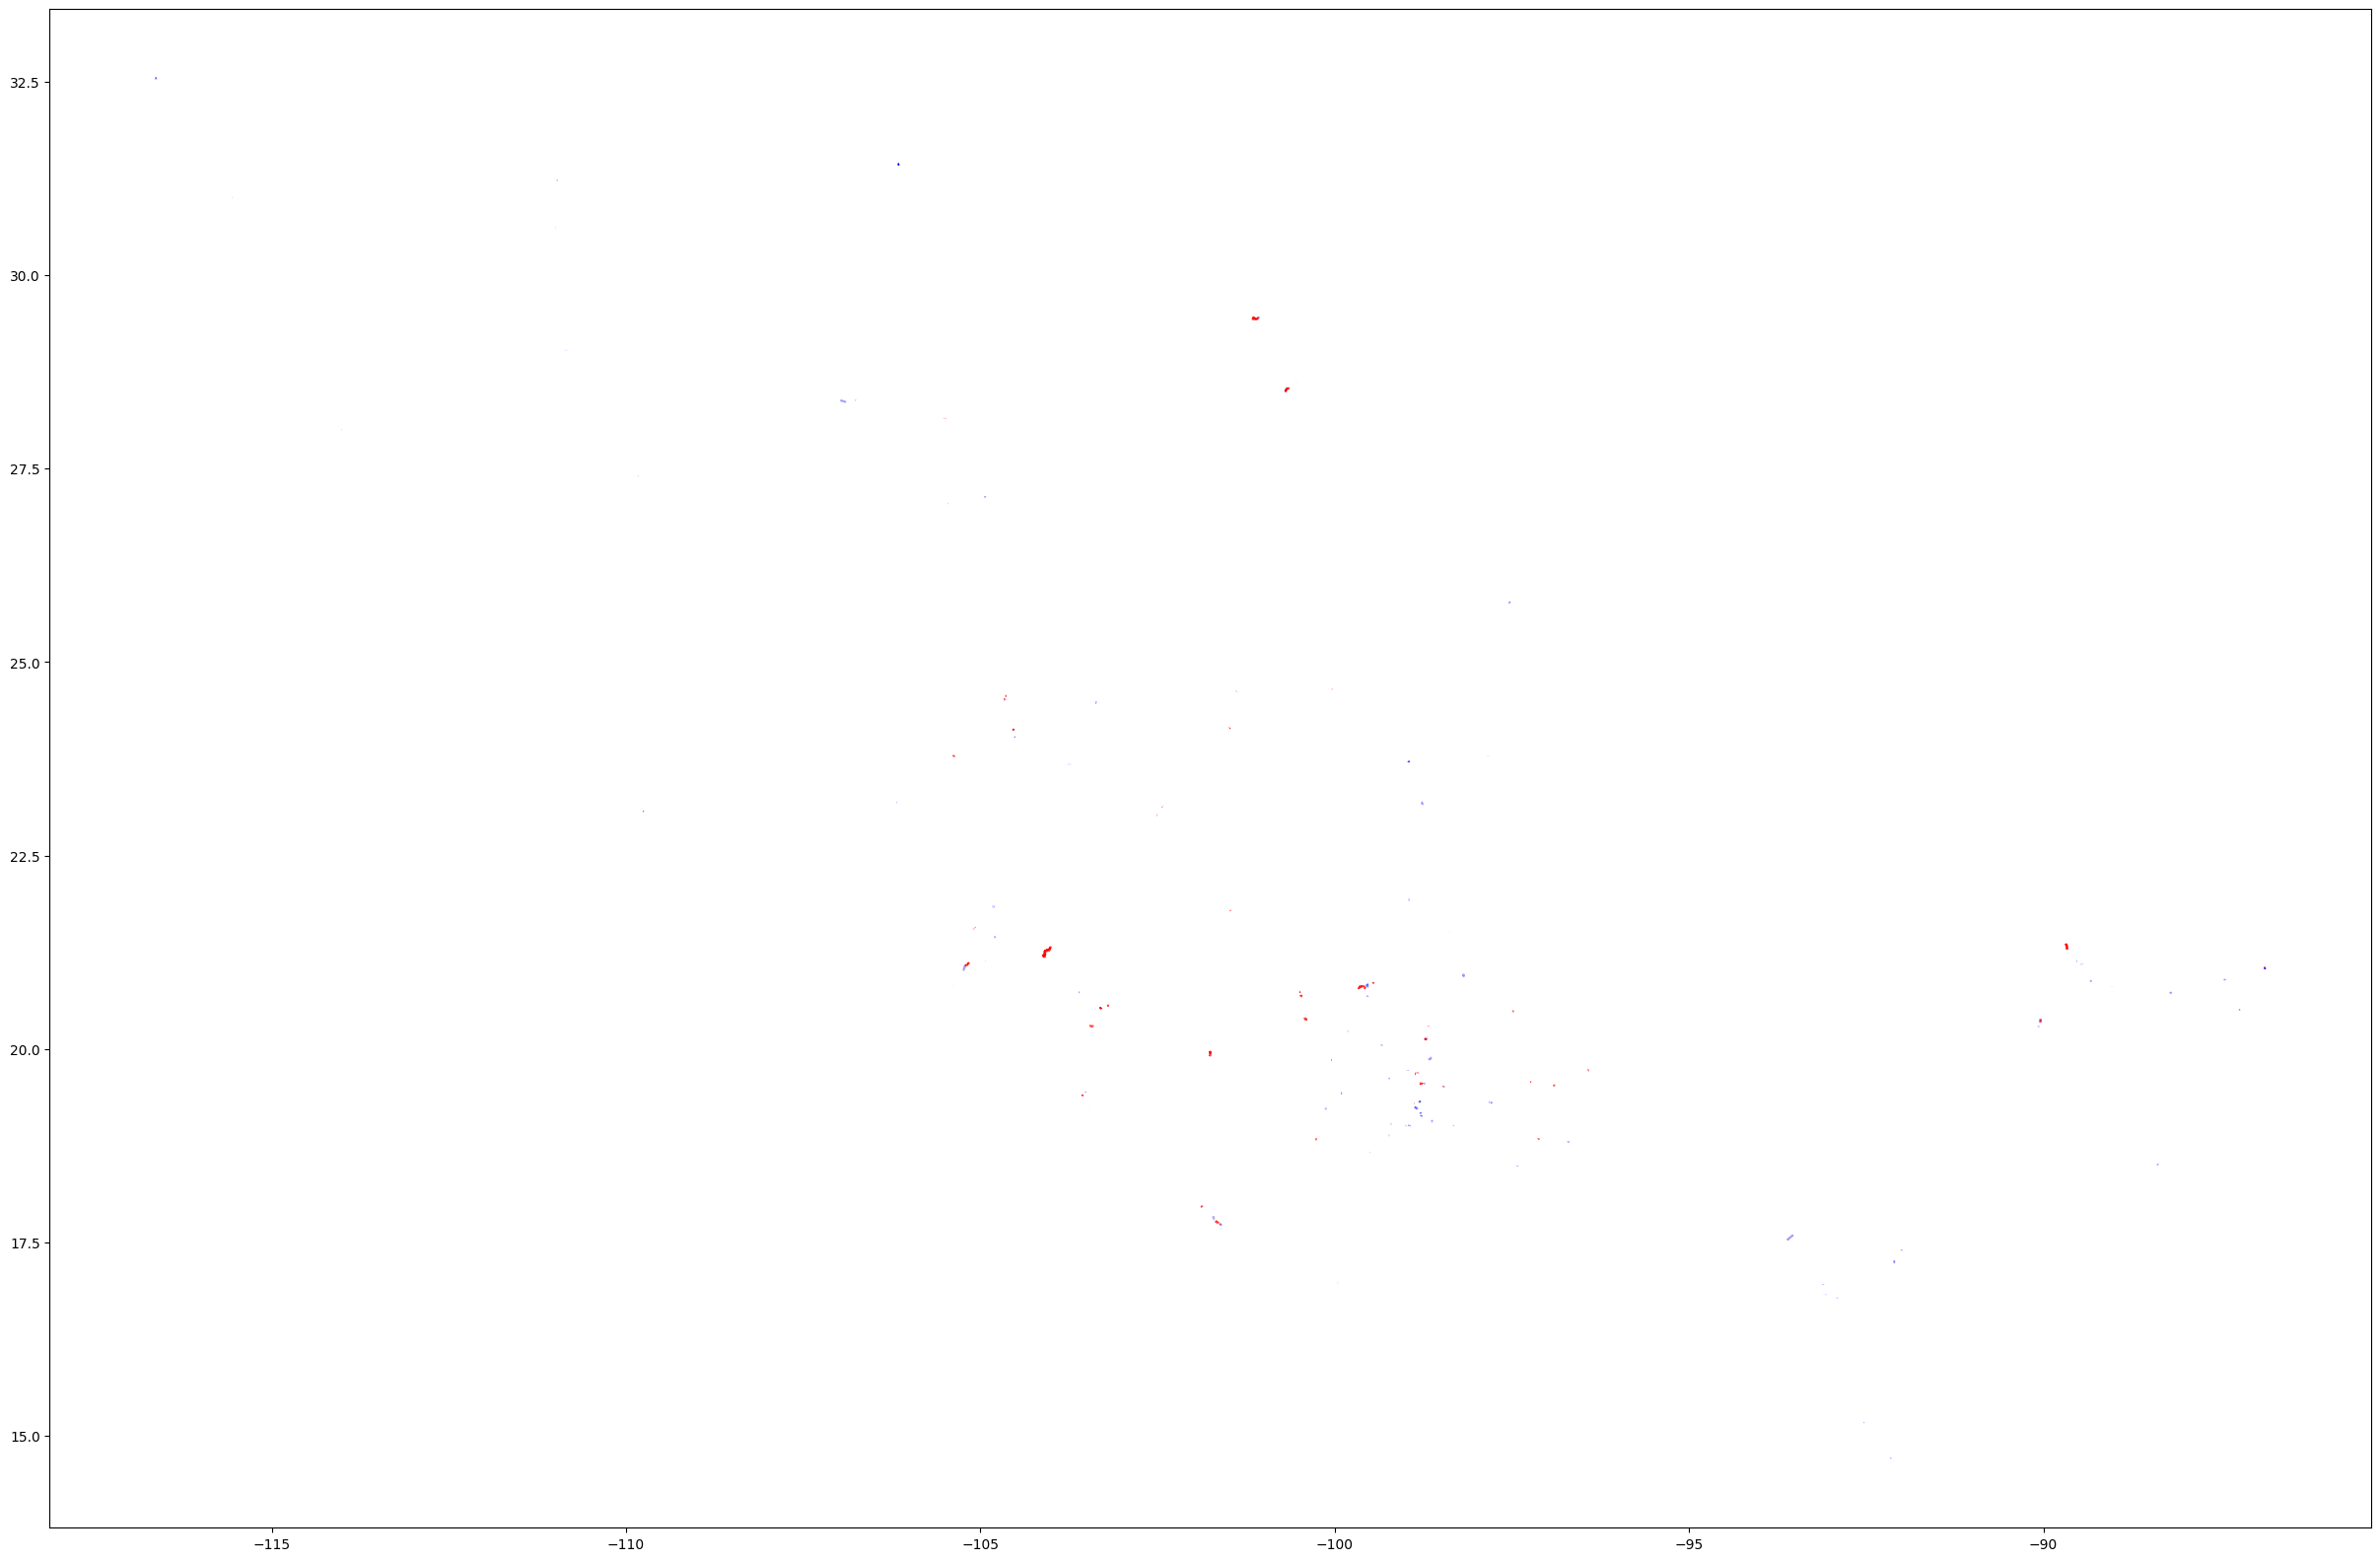

In [33]:
axis = sin_ID.plot(color='red', figsize=(40,20))
nuevos_ID.plot(ax=axis, color='blue',alpha=0.4, figsize=(40,20))

In [ ]:
#CAMBIO2
columna1 = 'UNION_INI'
columna2 = 'UNION_FIN'
columna3 = 'CODIGO'
# Columnas CF_con_ID
columna4 = 'NOMBRE'

while len(sin_ID)>307:

  for idx, row in sin_ID.iterrows():

    if (row[columna1] in CF_con_ID[columna2].values) and (row[columna2] in CF_con_ID[columna1].values):
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] in CF_con_ID[columna2].values and (row[columna2] not in CF_con_ID[columna1].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna2] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] not in CF_con_ID[columna2].values and (row[columna2] in CF_con_ID[columna1].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif (row[columna1] in CF_con_ID[columna1].values) and (row[columna2] in CF_con_ID[columna2].values):
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna1], 'NOMBRE'].values[0]
      nombre_nuevo2 = CF_con_ID.loc[CF_con_ID[columna2] == row[columna2], 'NOMBRE'].values[0]
      if nombre_nuevo == nombre_nuevo2:
        sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
        añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
        CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
        nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
        sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
      elif nombre_nuevo != nombre_nuevo2:
        sin_ID.at[idx, 'conex_ini'] = nombre_nuevo
        sin_ID.at[idx, 'conex_fin'] = nombre_nuevo2
      else:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']

    elif row[columna1] in CF_con_ID[columna1].values and (row[columna2] not in CF_con_ID[columna2].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] not in CF_con_ID[columna1].values and (row[columna2] in CF_con_ID[columna2].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna2] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
    #elif (row[columna1] > CF_con_ID[columna1].values) and (row[columna1] < CF_con_ID[columna2].values) and (row[columna2] > CF_con_ID[columna1].values) and (row[columna2] < CF_con_ID[columna2].values):

    else:
      sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']

KeyboardInterrupt: 

In [ ]:
elif CF_con_ID[columna1] <= CF_con_ID[columna2].values
  if row[columna1]< row[columna2].values:
    if (row[columna1] > CF_con_ID[columna1].values) and (row[columna1] < CF_con_ID[columna2].values) and (row[columna2] > CF_con_ID[columna1].values) and (row[columna2] < CF_con_ID[columna2].values):

  elif row[columna1]> row[columna2].values:
    if (row[columna2] > CF_con_ID[columna1].values) and (row[columna2] < CF_con_ID[columna2].values) and (row[columna1] > CF_con_ID[columna1].values) and (row[columna1] < CF_con_ID[columna2].values):


In [ ]:
elif CF_con_ID[columna1] >= CF_con_ID[columna2].values
  if row[columna1]< row[columna2].values:
    if (row[columna1] > CF_con_ID[columna2].values) and (row[columna1] < CF_con_ID[columna1].values) and (row[columna2] > CF_con_ID[columna2].values) and (row[columna2] < CF_con_ID[columna1].values):

  elif row[columna1]> row[columna2].values:
    if (row[columna2] > CF_con_ID[columna2].values) and (row[columna2] < CF_con_ID[columna1].values) and (row[columna1] > CF_con_ID[columna2].values) and (row[columna1] < CF_con_ID[columna1].values):